# Practicing and experimenting

I started off with using the Hershey font notebook and trying out the examples and playing around with them

In [76]:
import json

In [77]:
all_data = json.load(open("./hersheytext.json"))

In [78]:
all_data.keys()

dict_keys(['astrology', 'cursive', 'cyrillic', 'futural', 'futuram', 'gothiceng', 'gothicger', 'gothicita', 'greek', 'japanese', 'markers', 'mathlow', 'mathupp', 'meteorology', 'music', 'scriptc', 'scripts', 'symbolic', 'timesg', 'timesi', 'timesib', 'timesr', 'timesrb'])

In [79]:
futural = all_data['futural']['chars']

In [80]:
def idx(ch):
    return ord(ch) - 33

In [81]:
futural[idx('g')]

{'d': 'M15,8 L15,24 14,27 13,28 11,29 8,29 6,28 M15,11 L13,9 11,8 8,8 6,9 4,11 3,14 3,16 4,19 6,21 8,22 11,22 13,21 15,19',
 'o': 10}

In [82]:
def dch(font, ch):
    if ch == ' ':
        return 'M8,0'
    else:
        return font[idx(ch)]['d']
print(dch(futural, 'a'))
print(dch(futural, ' '))

M15,8 L15,22 M15,11 L13,9 11,8 8,8 6,9 4,11 3,14 3,16 4,19 6,21 8,22 11,22 13,21 15,19
M8,0


In [83]:
import vsketch
from bezmerizing import Polyline

In [84]:
import numpy as np
def to_plist(font, ch):
    plines = []
    current_plist = []
    mode = ''
    for t in dch(font, ch).split():
        if t[0] in ('M', 'L'):
            mode = t[0]
            t = t[1:]
        coords = [int(x) for x in t.split(',')]
        if mode == 'M':
            if len(current_plist) > 0:
                plines.append(current_plist)
                current_plist = []
        current_plist.append(coords)
    plines.append(current_plist)
    return plines

In [85]:
x_plist = to_plist(futural, "x")
x_plist

[[[3, 8], [14, 22]], [[14, 8], [3, 22]]]

In [86]:
sheared_plist = []
angle = np.pi * -0.25
# iterate over every stroke
for pline in to_plist(futural, 'R'):
    sheared_stroke = []
    # every coordinate in this stroke
    for coord in pline:
        sheared_stroke.append([coord[0]+angle*coord[1], coord[1]])
    # append to the transformed list of polylines
    sheared_plist.append(sheared_stroke)

In [87]:
def str_to_plist(font, s, kern=1):
    current_x = 0
    all_plines = []
    for ch in s:
        max_x = 0
        for pline in to_plist(font, ch):
            # translate to the current position of cursor
            translated = [[x+current_x, y] for x, y in pline]
            x_extent = max([c[0] for c in pline])
            if x_extent > max_x:
                max_x = x_extent
            all_plines.append(translated)
        current_x += max_x + kern
    return all_plines

In [88]:
str_plist = str_to_plist(futural, "zit tix")
str_plist

[[[14, 8], [3, 22]],
 [[3, 8], [14, 8]],
 [[3, 22], [14, 22]],
 [[18, 1], [19, 2], [20, 1], [19, 0], [18, 1]],
 [[19, 8], [19, 22]],
 [[26, 1], [26, 18], [27, 21], [29, 22], [31, 22]],
 [[23, 8], [30, 8]],
 [[40, 0]],
 [[46, 1], [46, 18], [47, 21], [49, 22], [51, 22]],
 [[43, 8], [50, 8]],
 [[55, 1], [56, 2], [57, 1], [56, 0], [55, 1]],
 [[56, 8], [56, 22]],
 [[61, 8], [72, 22]],
 [[72, 8], [61, 22]]]

In [89]:
from itertools import chain
def str_to_plist_wrap(font, s, kern=1, lineheight=32, width=360, height=360):
    current = [0, 0]
    all_plists = []
    for word in s.split():
        wplist = str_to_plist(font, word, kern)
        # flatten the list of strokes to find the biggest X coordinate
        wplist_width = max([c[0] for c in chain(*wplist)])
        if current[0] + wplist_width > width:
            current[1] += lineheight
            current[0] = 0
        if current[1] > height - lineheight:
            break
        wplist_translated = []
        # translate all polylines
        for pline in wplist:
            wplist_translated.append(
                [[x+current[0], y+current[1]] for x, y in pline])
        # add these translated strokes to the big list
        all_plists.extend(wplist_translated)
        current[0] += wplist_width + 8 # width of space
    return all_plists

### Combining different combinations of characters

### Combining 2 'c's (Selected a curvy character)

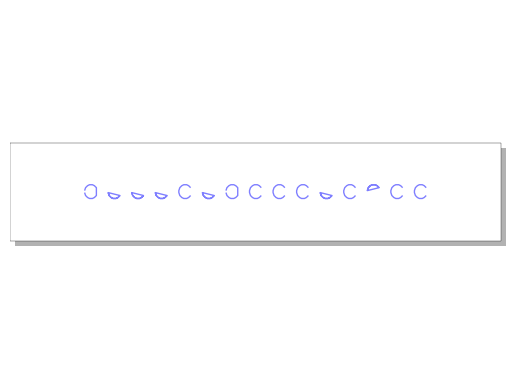

In [90]:


chars = 'c'
chars += chars.lower()
chars += 'c'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(15):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-50 + i * 12, 0)
        vsk.scale(0.5)
        vsk.polygon(smooshed)
vsk.display()

### Combination of different curvy looking characters

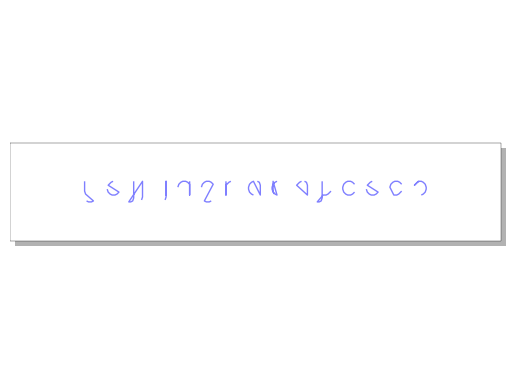

In [91]:
chars = 'uoasgjmncuoasgjmn'
chars += chars.lower()
chars += 'c'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(15):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-50 + i * 12, 0)
        vsk.scale(0.5)
        vsk.polygon(smooshed)
vsk.display()

### Only sharp characters

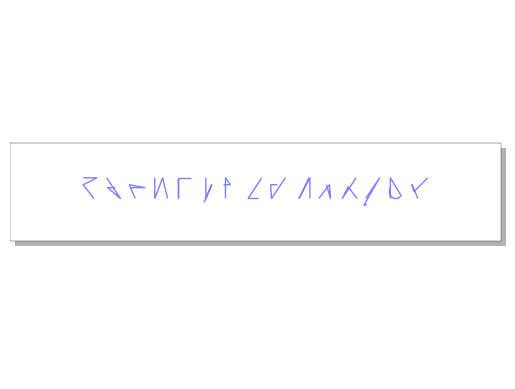

In [92]:
chars = 'zxvlkhfytew'
chars += chars.upper()
chars += '7'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(15):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-50 + i * 12, 0)
        vsk.scale(0.5)
        vsk.polygon(smooshed)
vsk.display()

### Similar looking characters

#It made people!! :O

I randomly tried combining 'i' and 'j' and surprisingly, it gave me glyphs that looked like little people which I really liked and wanted to use it for the final sketch


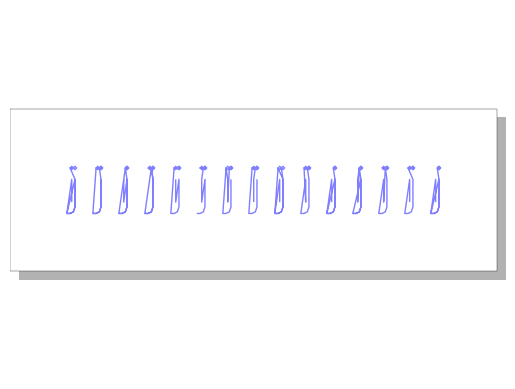

In [93]:
chars = 'j'
chars += chars.lower()
chars += 'i'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("150mm", "50mm")
vsk.scale("1mm")
for i in range(15):
    strokes = random.sample(all_strokes, 5)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-50 + i * 8, 0)
        vsk.scale(0.5)
        vsk.polygon(smooshed)
vsk.display()

### Sign boards?

With the row of people, I had an idea to give the people signs to hold and used the noise method to create 'signs' of different sizes

In [94]:
import sys
!{sys.executable} -m pip install opensimplex


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [95]:
import opensimplex

In [96]:
opensimplex.noise2(10, 20)

np.float64(-0.5274028646454091)

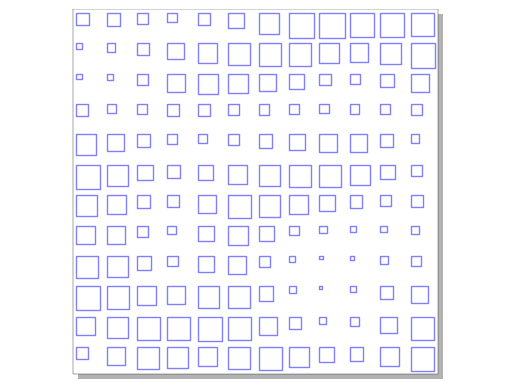

In [97]:
width = 200
height = 200
grid_size = 12
cell_size = width/grid_size
noise_step = 0.02
vsk = vsketch.Vsketch()
vsk.size(f"{width}mm", f"{height}mm")
vsk.scale("1mm")
for i in range(grid_size):
    for j in range(grid_size):
        x = (i * cell_size) + cell_size * 0.5
        y = (j * cell_size) + cell_size * 0.5
        val = opensimplex.noise2(x*noise_step, y*noise_step)
        val_scaled = (val + 1) * 0.5
        vsk.square(x, y, val_scaled * cell_size)
vsk.display()

# Project 1 - Row of people holding signs

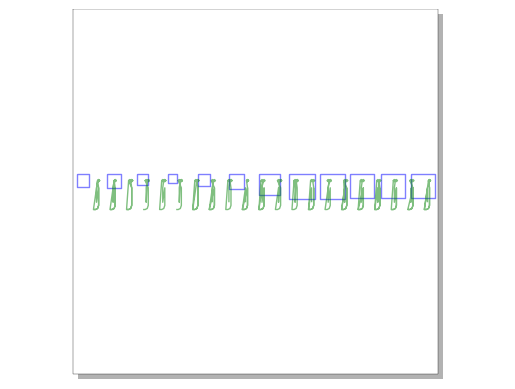

In [98]:
chars = 'j'
chars += chars.lower()
chars += 'i'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

width = 200
height = 200
grid_size = 12
cell_size = width/grid_size
noise_step = 0.02
vsk = vsketch.Vsketch()
vsk.size(f"{width}mm", f"{height}mm")
vsk.scale("1mm")
for i in range(grid_size):
    for j in range(1):
        x = (i * cell_size) + cell_size * 0.5
        y = (j * cell_size) + cell_size * 0.5
        val = opensimplex.noise2(x*noise_step, y*noise_step)
        val_scaled = (val + 1) * 0.5
        vsk.stroke(1)
        vsk.square(x, y, val_scaled * cell_size)

import random
vsk.scale("0.3mm")
for i in range(21):
    strokes = random.sample(all_strokes, 5)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(15 + i * 8, 10)
        vsk.scale(0.5)
        vsk.stroke(2)
        vsk.polygon(smooshed)

vsk.display()

In [99]:
src = '''\
Is this a secret message?'''

# Project 2 - Is this a secret message?

I remember reading about how we read words as a whole and wanted to experiment with levels of distortion of words. I wanted to experiment with which level of distortion people are able to guess what was written in the message. I tried out 8 levels of noise from most distorted to least distorted

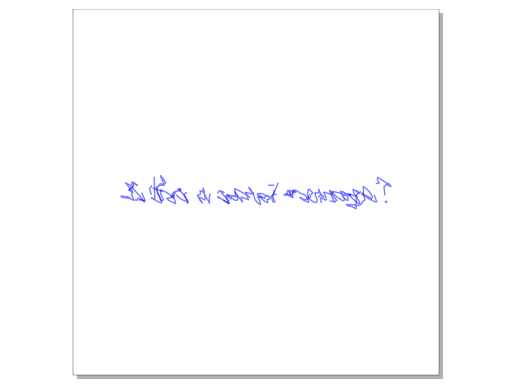

In [100]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.2 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

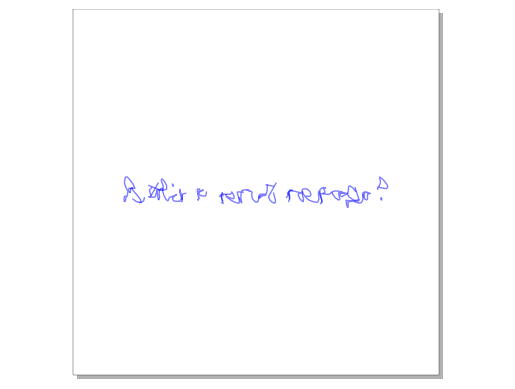

In [101]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.1 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

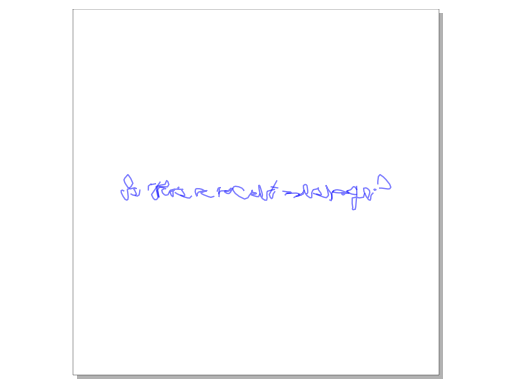

In [102]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.08 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

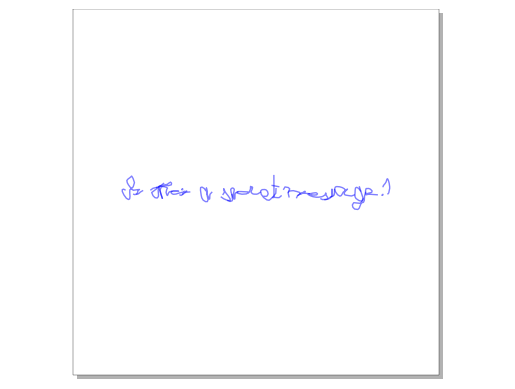

In [103]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.07 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

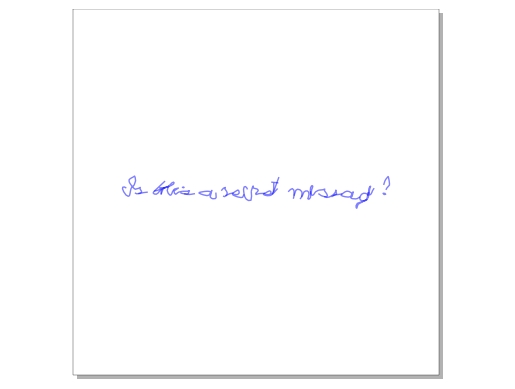

In [104]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.06 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

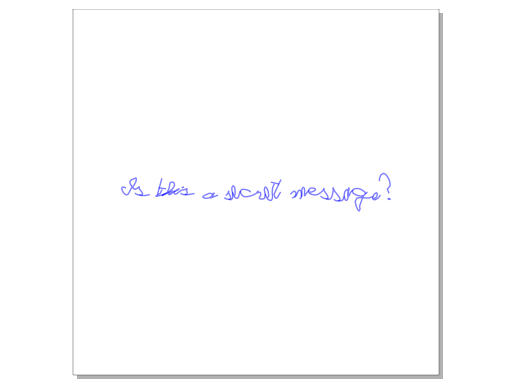

In [105]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.05 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

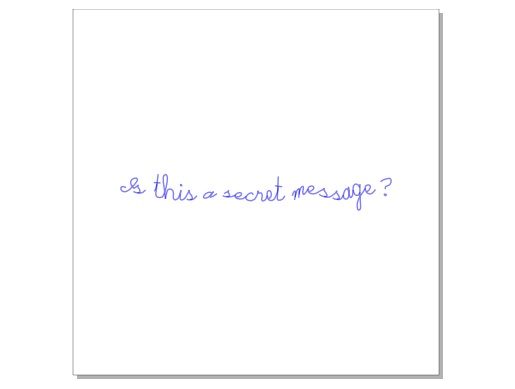

In [106]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.03 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

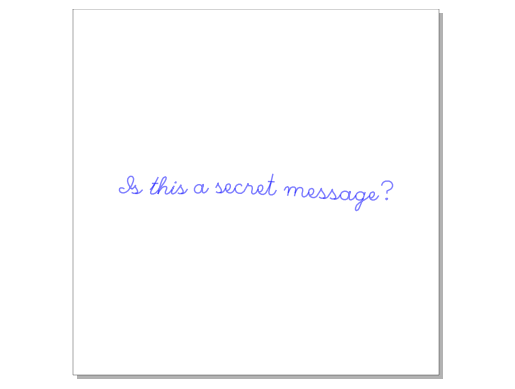

In [107]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], src, kern=0)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.01 # movement over noise space
namp = 8 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(0.6)
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)
vsk.display()

# Project 3 - Free Speech

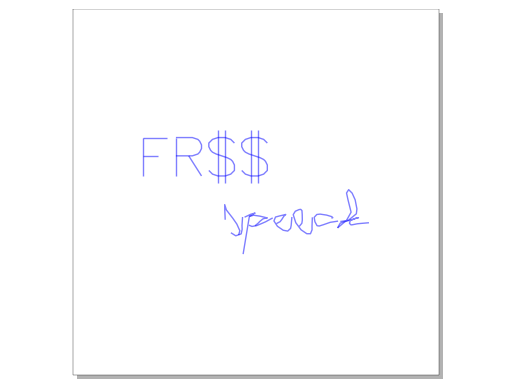

In [108]:
text_plist = str_to_plist_wrap(all_data['cursive']['chars'], "speech", kern=1)
doc_height = 240 # mm
doc_width = 240 # mm
nstep = 0.07 # movement over noise space
namp = 7 # noise multiplier
vsk = vsketch.Vsketch()
vsk.size(f"{doc_height}mm", f"{doc_width}mm")
vsk.scale("1mm")
vsk.scale(1.2)

vsk.translate(50, 30) 
for pline in str_to_plist(futural, "FR$$"):
    vsk.polygon(pline)

vsk.translate(50, 30) 
for pline in text_plist:
    noise_pline = [[x + opensimplex.noise2(x*nstep, y*nstep)*namp,
                    y + opensimplex.noise2(x*nstep, y*nstep)*namp]
                   for x, y in pline]
    vsk.polygon(noise_pline)



vsk.display()

# Project 4 - Fake News

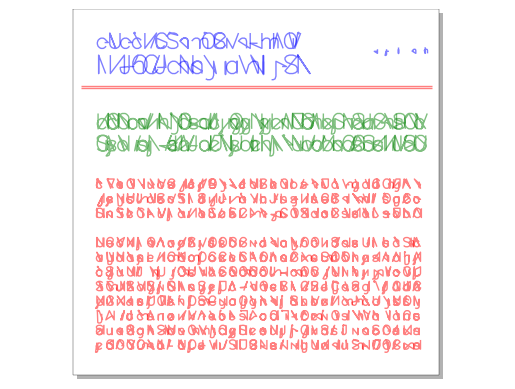

In [109]:
ls = 10
chars = 'uoasgjmncuoasgjmn'
chars += chars.upper()
chars += 'c'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 22:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "250mm")
vsk.scale("1mm")
for i in range(18):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-30 + i * 8, -180)
        vsk.scale(0.5)
        vsk.stroke(1)
        vsk.polygon(smooshed)

for i in range(18):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-30 + i * 8, -165)
        vsk.scale(0.6)
        vsk.stroke(1)
        vsk.polygon(smooshed)


for i in range(5):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(160 + i * 8, -170)
        vsk.scale(0.2)
        vsk.stroke(1)
        vsk.polygon(smooshed)

lss = -140
lsss = 15
for j in range(2):
    lss = lss + lsss
    for i in range(32):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 7, lss)
            vsk.scale(0.5)
            vsk.stroke(2)
            vsk.polygon(smooshed)

lss = -90
for j in range(3):
    lss = lss + ls
    for i in range(32):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 7, lss)
            vsk.scale(0.3)
            vsk.stroke(3)
            vsk.polygon(smooshed)

lss = -50
for j in range(8):
    lss = lss + ls
    for i in range(32):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 7, lss)
            vsk.scale(0.3)
            vsk.stroke(3)
            vsk.polygon(smooshed)

vsk.stroke(3)
vsk.line(-40, -142, 200, -142)
vsk.line(-40, -143, 200, -143)
        
vsk.display()

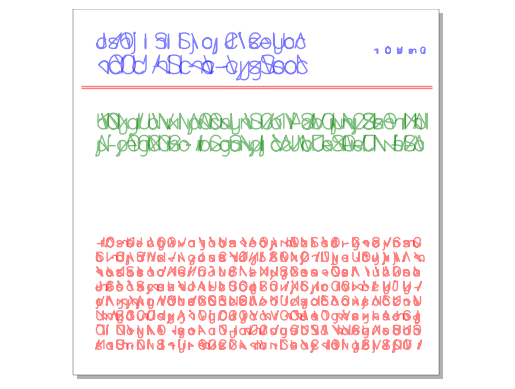

In [110]:
ls = 10
chars = 'uoasgjmncuoasgjmn'
chars += chars.upper()
chars += 'c'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 22:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "250mm")
vsk.scale("1mm")
for i in range(18):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-30 + i * 8, -180)
        vsk.scale(0.5)
        vsk.stroke(1)
        vsk.polygon(smooshed)

for i in range(18):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-30 + i * 8, -165)
        vsk.scale(0.6)
        vsk.stroke(1)
        vsk.polygon(smooshed)


for i in range(5):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(160 + i * 8, -170)
        vsk.scale(0.2)
        vsk.stroke(1)
        vsk.polygon(smooshed)

lss = -140
lsss = 15
for j in range(2):
    lss = lss + lsss
    for i in range(32):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 7, lss)
            vsk.scale(0.5)
            vsk.stroke(2)
            vsk.polygon(smooshed)



lss = -50
for j in range(8):
    lss = lss + ls
    for i in range(32):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 7, lss)
            vsk.scale(0.3)
            vsk.stroke(3)
            vsk.polygon(smooshed)

chars = 'j'
chars += chars.lower()
chars += 'i'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)



vsk.stroke(3)
vsk.line(-40, -142, 200, -142)
vsk.line(-40, -143, 200, -143)
        
vsk.display()

### I wanted to create a 'picture' for the fake newspaper using the little people and their sign boards

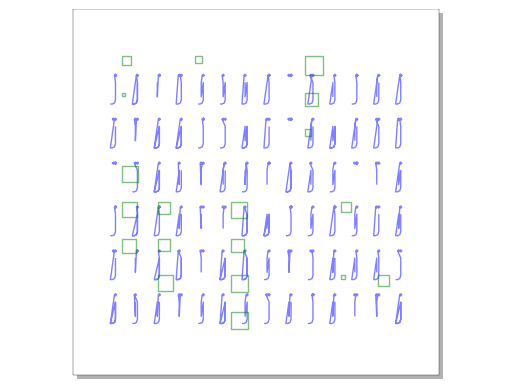

In [111]:
import random
from numpy.random import uniform, normal, choice
import numpy as np
vsk = vsketch.Vsketch()
vsk.size("250mm", "250mm")
vsk.scale("1mm")

chars = 'j'
chars += chars.lower()
chars += 'i'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

lss = -50
ls = 30
for j in range(6):
    lss = lss + ls
    for i in range(14):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 15, lss)
            vsk.scale(0.7)
            vsk.stroke(1)
            vsk.polygon(smooshed)

grid_size = 8
cell_size = width/grid_size
noise_step = 0.02
vsk.translate(-120 + i * 7, lss - 170)
for i in range(grid_size):
    for j in range(grid_size): 
        if uniform() < 0.35:
            x = (i * cell_size) + cell_size * 0.3
            y = (j * cell_size) + cell_size * 0.3
            val = opensimplex.noise2(x*noise_step, y*noise_step)
            val_scaled = (val + 1) * 0.3
            vsk.stroke(2)
            vsk.square(x, y, val_scaled * cell_size)

vsk.display()

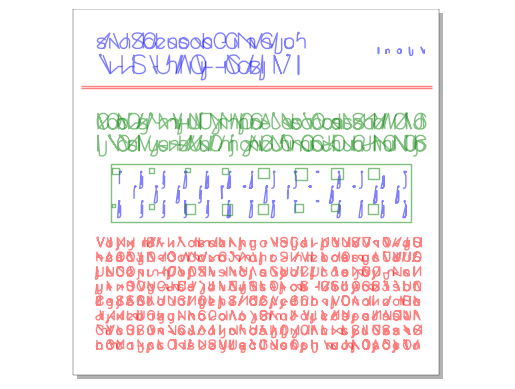

In [112]:
import random
from numpy.random import uniform, normal, choice
import numpy as np
vsk = vsketch.Vsketch()
vsk.size("250mm", "250mm")
vsk.scale("1mm")

ls = 10
chars = 'uoasgjmncuoasgjmn'
chars += chars.upper()
chars += 'c'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 22:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

for i in range(18):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-30 + i * 8, -180)
        vsk.scale(0.5)
        vsk.stroke(1)
        vsk.polygon(smooshed)

for i in range(18):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-30 + i * 8, -165)
        vsk.scale(0.6)
        vsk.stroke(1)
        vsk.polygon(smooshed)
for i in range(5):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(160 + i * 8, -170)
        vsk.scale(0.2)
        vsk.stroke(1)
        vsk.polygon(smooshed)

lss = -140
lsss = 15
for j in range(2):
    lss = lss + lsss
    for i in range(32):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 7, lss)
            vsk.scale(0.5)
            vsk.stroke(2)
            vsk.polygon(smooshed)
lss = -50
for j in range(8):
    lss = lss + ls
    for i in range(32):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-30 + i * 7, lss)
            vsk.scale(0.3)
            vsk.stroke(3)
            vsk.polygon(smooshed)

chars = 'j'
chars += chars.lower()
chars += 'i'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)



vsk.stroke(3)
vsk.line(-40, -142, 200, -142)
vsk.line(-40, -143, 200, -143)  
#------------------------------------
chars = 'j'
chars += chars.lower()
chars += 'i'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

lss = -50
ls = 20
for j in range(2):
    lss = lss + ls
    for i in range(14):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-15 + i * 15, lss-55)
            vsk.scale(0.4)
            vsk.stroke(1)
            vsk.polygon(smooshed)

lss = -30
ls = 20
for j in range(1):
    lss = lss + ls
    for i in range(13):
        strokes = random.sample(all_strokes, 3)
        smooshed = list(chain(*strokes))
        with vsk.pushMatrix():
            vsk.translate(-5 + i * 15, lss-65)
            vsk.scale(0.4)
            vsk.stroke(1)
            vsk.polygon(smooshed)

grid_size = 8
cell_size = width/grid_size
noise_step = 0.02
vsk.translate(-115 + i * 7, lss - 85)
for i in range(grid_size):
    for j in range(2): 
        if uniform() < 0.85:
            x = (i * cell_size) + cell_size * 0.5
            y = (j * cell_size) + cell_size * 0.3
            val = opensimplex.noise2(x*noise_step, y*noise_step)
            val_scaled = (val + 1) * 0.2
            vsk.stroke(2)
            vsk.square(x, y, val_scaled * cell_size)
        
vsk.rect(12, 5, 205, 40)

vsk.display()